# Example of Decision Trees (DT) implementation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
import warnings


In [2]:
warnings.filterwarnings("ignore")


## Data preparation

In [3]:
# Generate a random dataset with 2 classes
np.random.seed(0)
X = np.random.randn(1000, 2)
y = np.logical_and(X[:, 0] > 0, X[:, 1] > 0)


In [4]:
cent_init_c0 = np.array([np.mean(X[y == 0, 0]), np.mean(X[y == 0, 1])])
cent_init_c1 = np.array([np.mean(X[y == 1, 0]), np.mean(X[y == 1, 1])])


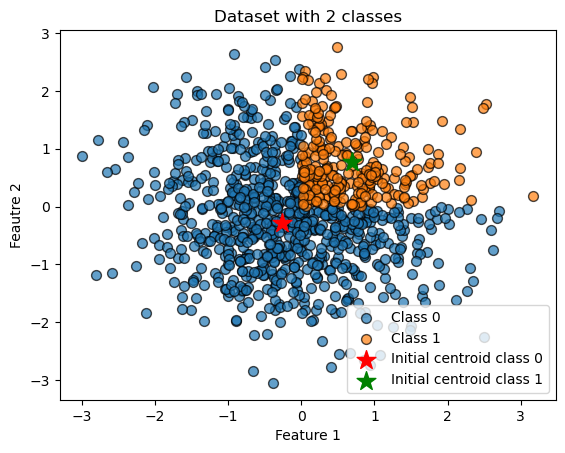

In [5]:
# Show the data in a scatter plot
plt.figure()
plt.title('Dataset with 2 classes')
for i in np.unique(y):
    plt.scatter(X[y == i, 0], X[y == i, 1], s=50,
                label='Class %d' % i, alpha=0.7, edgecolors='k')
plt.scatter(cent_init_c0[0], cent_init_c0[1], s=200,
            marker='*', c='r', label='Initial centroid class 0')
plt.scatter(cent_init_c1[0], cent_init_c1[1], s=200,
            marker='*', c='g', label='Initial centroid class 1')
plt.xlabel('Feature 1')
plt.ylabel('Feautre 2')
plt.legend()
plt.show()


## Application of the K-Means method

### Calculate the BER, SER and Accuracy

In [6]:
initial_centroids = np.array([cent_init_c0, cent_init_c1])

model = KMeans(n_clusters=2, init=initial_centroids, random_state=0).fit(X)
y_pred = model.predict(X)

print('Accuracy:', accuracy_score(y, y_pred))


Accuracy: 0.753


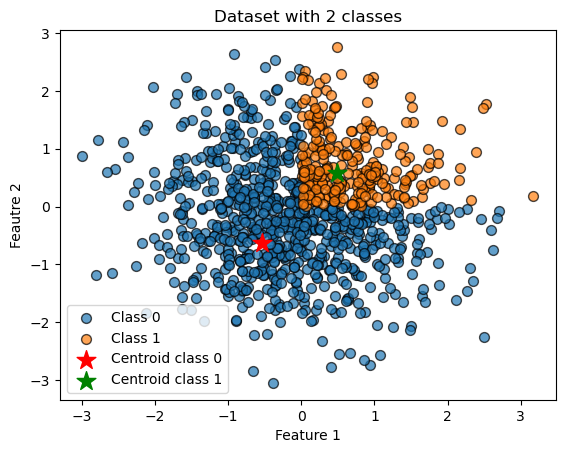

In [7]:
# Show the data in a scatter plot
plt.figure()
plt.title('Dataset with 2 classes')
for i in np.unique(y):
    plt.scatter(X[y == i, 0], X[y == i, 1], s=50,
                label='Class %d' % i, alpha=0.7, edgecolors='k')
plt.scatter(model.cluster_centers_[0, 0], model.cluster_centers_[0, 1],
            s=200, marker='*', c='r', label='Centroid class 0')
plt.scatter(model.cluster_centers_[1, 0], model.cluster_centers_[1, 1],
            s=200, marker='*', c='g', label='Centroid class 1')
plt.xlabel('Feature 1')
plt.ylabel('Feautre 2')
plt.legend()
plt.show()
